In [ ]:
pip install pydataset

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 15.9 MB 22.2 MB/s 
  Created wheel for pydataset: filename=pydataset-0.2.0-py3-none-any.whl size=15939432 sha256=37f216d9fd2c58d5e39fd2856b35f7609fcd382487421d987fa442f37ed04978
  Stored in directory: /root/.cache/pip/wheels/32/26/30/d71562a19eed948eaada9a61b4d722fa358657a3bfb5d151e2
Successfully built pydataset


In [ ]:
# import packages
import pandas as pd
import numpy as np
from os import makedirs
from os import path
import math
import re

import matplotlib.pyplot as plt
import seaborn as sns

import nltk.downloader
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
from nltk.util import ngrams

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from pydataset import data
from sklearn.ensemble  import BaggingClassifier, \
         ExtraTreesClassifier, RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.svm import SVC
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import VotingClassifier

import pickle
import json

initiated datasets repo at: /root/.pydataset/


# DATA UPDATE

In [ ]:
# LOAD THE DATA
from google.colab import files
uploaded = files.upload()

Saving CleanData.csv to CleanData.csv


In [ ]:
# IMPORTING DATA SET
df = pd.read_csv('CleanData.csv',encoding='utf-8',sep=","
                , names=["tweet", "sentiment"],
                 usecols=[
                     'tweet', 
                     'sentiment',],
                 dtype={
                     'tweet': str,
                     'sentiment': str,
                 })
df

,tweet,sentiment
0,cleantext,Sentiment_Type
1,for those who missed our ama last night,NEUTRAL
2,alt season is coming choose your favorite altcoin shinja flokiinu babydogecoin,POSITIVE
3,the future belongs to those who believe in the beauty of their dreams press forward we...,NEUTRAL
4,how are your top gems doing today me was a long day gamefi bscgem solana nfta,POSITIVE
...,...,...
5802,rn im focussing on because they have the best use case in the nft scene that being acc...,POSITIVE
5803,join the leopard tribe now to gain acces to an exclusive marketplace,NEUTRAL
5804,should you buy forest knight knight saturday investorsobserver crypto,NEUTRAL
5805,blockchain is a new technology transfer and storage of value is one of its use cases w...,POSITIVE


In [ ]:
df.drop([0],axis=0, inplace=True)

In [ ]:
# set up label dataframe for future refrences

label = [-1, 0, 1]
labelN = ["Negative", "Neutral", "Positive"]
labelDesc = [" did you miss or sell shib early? did shibainu leave you with a broken heart? well cry not life has given you a shib",
             "what you prefer? babydoge or doge?"
             " let it not be a surprise to you when  will do , i know many people will not believe it but babydoge"
]

labelDf = pd.DataFrame(list(zip(label, labelN, labelDesc)), columns=["label", "name", "description"])


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5806 entries, 1 to 5806
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet      5805 non-null   object
 1   sentiment  5806 non-null   object
dtypes: object(2)
memory usage: 136.1+ KB


# Distribution of Sentiments

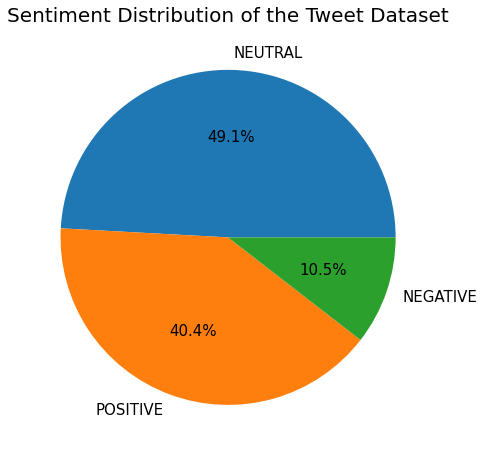

In [ ]:
#Distribution of Sentiments
plt.figure(figsize = (7, 7))
plt.pie(df.sentiment.value_counts().values, labels = df.sentiment.value_counts().index, autopct = '%2.1f%%', textprops={'fontsize': 15})
plt.title('Sentiment Distribution of the Tweet Dataset', fontsize=20)
plt.tight_layout()
plt.show()

In [ ]:
df.dropna(subset = ["tweet"], inplace=True)


In [ ]:
df.sentiment.value_counts()

NEUTRAL     2852
POSITIVE    2344
NEGATIVE     609
Name: sentiment, dtype: int64

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
import re

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
df

,tweet,sentiment
1,for those who missed our ama last night,NEUTRAL
2,alt season is coming choose your favorite altcoin shinja flokiinu babydogecoin,POSITIVE
3,the future belongs to those who believe in the beauty of their dreams press forward we...,NEUTRAL
4,how are your top gems doing today me was a long day gamefi bscgem solana nfta,POSITIVE
5,hello there crypto market its been a while,NEUTRAL
...,...,...
5802,rn im focussing on because they have the best use case in the nft scene that being acc...,POSITIVE
5803,join the leopard tribe now to gain acces to an exclusive marketplace,NEUTRAL
5804,should you buy forest knight knight saturday investorsobserver crypto,NEUTRAL
5805,blockchain is a new technology transfer and storage of value is one of its use cases w...,POSITIVE


# TOKENIZE and REMOVE STOPWORDS




In [ ]:
def tokenize(tweet):
  tokens = word_tokenize(tweet)
  return tokens
df

tokenizedLi = df['tweet'].apply(lambda x: tokenize(x))
pd.Series(tokenizedLi[:5])

1                                             [for, those, who, missed, our, ama, last, night]
2    [alt, season, is, coming, choose, your, favorite, altcoin, shinja, flokiinu, babydogec...
3    [the, future, belongs, to, those, who, believe, in, the, beauty, of, their, dreams, pr...
4    [how, are, your, top, gems, doing, today, me, was, a, long, day, gamefi, bscgem, solan...
5                                          [hello, there, crypto, market, its, been, a, while]
Name: tweet, dtype: object

In [ ]:
print(type(df["tweet"]))

<class 'pandas.core.series.Series'>


# STOPWORDS

In [ ]:
# To get stop words.
nltk.download('stopwords')

def removeStopWords(tokenList):
    '''
    Create array of words with no punctuation or stop words.
    :param tokenList: tokenized list
    :return: array of words with no punctuation or stop words.
    '''
    stopWords = set(stopwords.words('english'))
    shorterSentences = []  # Declare empty array of sentences.

    for sentence in tokenList:
        shorterSentence = []  # Declare empty array of words in single sentence.
        for word in sentence:
            if word not in stopWords:
                # Remove leading and trailing spaces.
                word = word.strip()
                # Ignore single character words and digits.
                if (len(word) > 1 and word.isdigit() == False):
                    # Add remaining words to list.
                    shorterSentence.append(word)
        shorterSentences.append(shorterSentence)
    return shorterSentences

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
tokenizedNoStopLi = removeStopWords(tokenizedLi)

print(f"Sample sentence BEFORE removing stop words:\n{tokenizedLi[7]}")
print(f"\n\nSample sentence AFTER removing stop words:\n{tokenizedNoStopLi[7]}")

Sample sentence BEFORE removing stop words:
['if', 'you', 'do', 'not', 'have', 'cvp', 'yet', 'make', 'sure', 'you', 'add', 'the', 'altcoin', 'to', 'your', 'bag', 'before', 'the', 'sta', 'of', 'the', 'bull', 's', 'vh1x9b0iwx']


Sample sentence AFTER removing stop words:
['journey', 'kibainu', 'far', 'getting', 'staed', 'go', 'kibakrew', 'kiba', 'altcoin', 'mem']


# STEMWORDS

In [ ]:
def stemWords(sentenceArrays):
    '''
    Removes suffixes and rebuilds the sentences.
    :param sentenceArrays: stentences list
    :return: array of sentences without suffixes
    '''
    ps = PorterStemmer()
    stemmedSentences = []
    for sentenceArray in sentenceArrays:
        stemmedArray = []  # Declare empty array of words.
        for word in sentenceArray:
            stemmedArray.append(ps.stem(word))  # Add stemmed word.

        # Convert array back to sentence of stemmed words.
        delimeter = ' '
        sentence = delimeter.join(stemmedArray)

        # Append stemmed sentence to list of sentences.
        stemmedSentences.append(sentence)
    return stemmedSentences

In [ ]:
stemmedLi = stemWords(tokenizedNoStopLi)

print(f"Sample sentence BEFORE stemming:\n{tokenizedNoStopLi[0]}")
print(f"\nSample sentence AFTER stemming:\n{stemmedLi[0]}")

Sample sentence BEFORE stemming:
['missed', 'ama', 'last', 'night']

Sample sentence AFTER stemming:
miss ama last night


# PLOTTING

In [ ]:
# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

import nltk
from nltk.corpus import wordnet
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

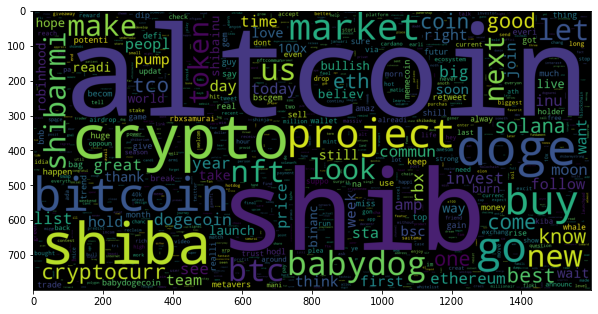

In [ ]:
#ANALYSING THE DATA
#Word-Cloud for Negative tweets.
stemmedLi = stemWords(tokenizedNoStopLi)
data_neg = stemmedLi[:2000]
plt.figure(figsize = (10,10))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data_neg))
plt.imshow(wc)

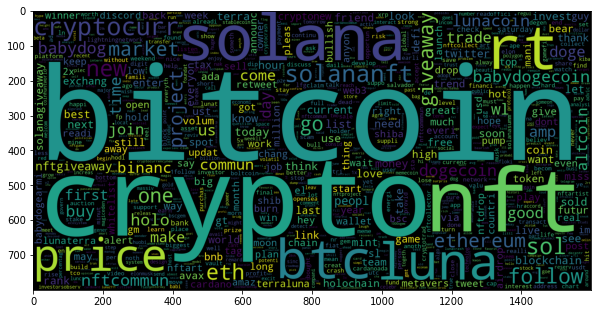

In [ ]:
#ANALYSING THE DATA
#Word-Cloud for Negative tweets.
stemmedLi = stemWords(tokenizedNoStopLi)
data_neg = stemmedLi[2000:]
plt.figure(figsize = (10,10))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data_neg))
plt.imshow(wc)

In [ ]:
def vectorizeList(stemmedList, ngramRangeStart, ngramRangeEnd):
    '''
    Creates a matrix of word vectors.
    :param stemmedList: stemmed sentence list
    :return: matrix of word vectors and vocabulary dictionary
    '''
    cv = CountVectorizer(binary=True, ngram_range=(ngramRangeStart, ngramRangeEnd))
    cv.fit(stemmedList)
    X = cv.transform(stemmedList)

    return X, cv.vocabulary_

In [ ]:
vectorizedTweets, vectorDictionary = vectorizeList(stemmedLi, 1, 1)

In [ ]:
print(f"Sample sentence #1:\n{stemmedLi[0]}")
print(f"Sample sentence #2:\n{stemmedLi[1]}")

Sample sentence #1:
miss ama last night
Sample sentence #2:
alt season come choos favorit altcoin shinja flokiinu babydogecoin


In [ ]:
print(f"\n#1 after vectorization:\n{vectorizedTweets[100]}")
print(f"#2 after vectorization:\n{vectorizedTweets[1]}")


#1 after vectorization:
  (0, 94)	1
  (0, 230)	1
  (0, 653)	1
  (0, 1159)	1
  (0, 1203)	1
  (0, 2107)	1
  (0, 2871)	1
  (0, 3358)	1
  (0, 4885)	1
  (0, 4923)	1
  (0, 6518)	1
#2 after vectorization:
  (0, 649)	1
  (0, 653)	1
  (0, 986)	1
  (0, 1748)	1
  (0, 1877)	1
  (0, 3075)	1
  (0, 3188)	1
  (0, 6918)	1
  (0, 7074)	1


In [ ]:
vectorizedTweets.shape

(5805, 8912)

In [ ]:
def generateWordList(wordDf, sentimentScore, n_gram_size):
    resultDf = wordDf[(wordDf['sentiment'] == sentimentScore)]

    sentences = [sentence.split() for sentence in resultDf['transformedTweets']]
    wordArray = []
    for i in range(0, len(sentences)):
        wordArray += sentences[i]

    counterList = Counter(ngrams(wordArray, n_gram_size)).most_common(80)

    counterDf = pd.DataFrame()

    delimiter = ' '
    print(f"\n***N-Gram (Sentiment: {sentimentScore})")
    for i in range(0, len(counterList)):
        counterDict = {
            "N-Gram" : delimiter.join(counterList[i][0])
            ,"Occurrences" : counterList[i][1]
        }
        # convert dict to series before concating to the dataframe.
        counterDict = pd.DataFrame(counterDict, index=[0])
        counterDf = pd.concat([counterDf, counterDict], ignore_index=True)

    return counterDf

In [ ]:
# N-Gram variables
SIZE = 2
# add transformedTweets column to the original dataset with the stemmed data.
df['transformedTweets'] = stemmedLi
dfSub = df[['sentiment', 'transformedTweets']]


In [ ]:
df.drop_duplicates(subset= "tweet", keep = 'first', inplace = True)
df.head()

,tweet,sentiment,transformedTweets
1,for those who missed our ama last night,NEUTRAL,miss ama last night
2,alt season is coming choose your favorite altcoin shinja flokiinu babydogecoin,POSITIVE,alt season come choos favorit altcoin shinja flokiinu babydogecoin
3,the future belongs to those who believe in the beauty of their dreams press forward we...,NEUTRAL,futur belong believ beauti dream press forward stop linger
4,how are your top gems doing today me was a long day gamefi bscgem solana nfta,POSITIVE,top gem today long day gamefi bscgem solana nfta
5,hello there crypto market its been a while,NEUTRAL,hello crypto market



***N-Gram (Sentiment: NEUTRAL)
                       N-Gram  Occurrences
0                 bitcoin btc           50
1              crypto bitcoin           34
2                     wl spot           31
3            solana solananft           30
4                  solana nft           29
5           crypto cryptocurr           28
6                 btc bitcoin           27
7                      let us           27
8               bitcoin price           27
9            bitcoin ethereum           27
10                 rt bitcoin           25
11                     btc ln           25
12        ln lightningnetwork           25
13  lightningnetwork boltcoin           25
14         bitcoin cryptocurr           24
15           solananft solana           24
16                    btc eth           23
17             crypto altcoin           21
18                 bitcoin rt           21
19                volum price           20


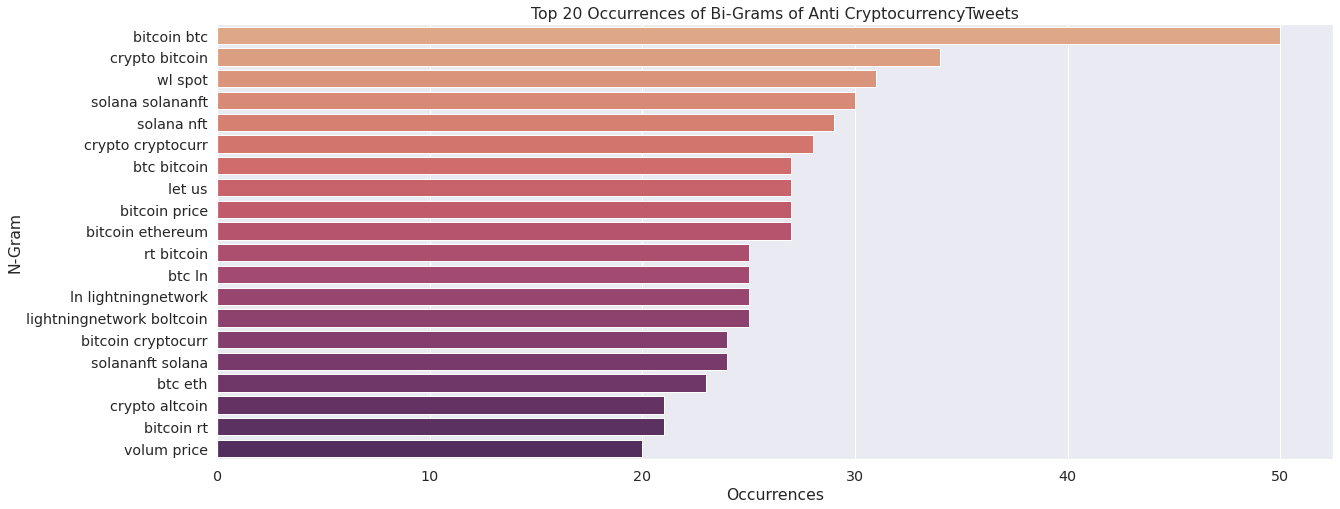

In [ ]:
counterDfAntiTop = generateWordList(dfSub, 'NEUTRAL', SIZE)
counterDfAntiTop = counterDfAntiTop.head(20)
print(counterDfAntiTop)

sns.set(font_scale = 1.3)
plt.figure(figsize=(20,8))
plt.title("Top 20 Occurrences of Bi-Grams of Anti CryptocurrencyTweets")
sns.set_style('darkgrid')
sns.barplot(x="Occurrences", y="N-Gram", data=counterDfAntiTop, palette="flare")


***N-Gram (Sentiment: NEGATIVE)
                 N-Gram  Occurrences
0      solana solananft           30
1         nftcommun nft           28
2               sold gt           23
3              gt price           23
4              price sl           23
5               sl rank           23
6               rank hr           23
7                 fp sl           23
8              sl owner           23
9               link gt           23
10            gt solana           23
11  solananft nftcommun           23
12            rank rank           21
13                hr nr           18
14                nr fp           18
15          bitcoin btc           10
16           solana nft           10
17       crypto bitcoin           10
18    cardboard citizen            9
19         citizen sold            9


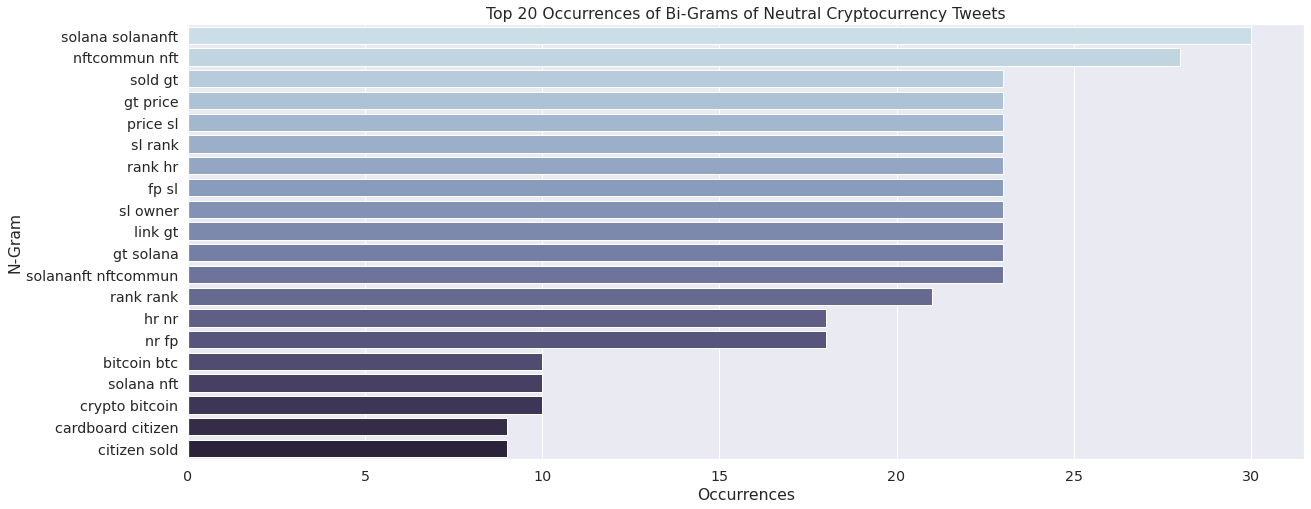

In [ ]:
counterDfNeutral = generateWordList(dfSub, 'NEGATIVE', SIZE)
counterDfNeutralTop = counterDfNeutral.head(20)
print(counterDfNeutralTop)

sns.set(font_scale = 1.3)
plt.figure(figsize=(20,8))
plt.title("Top 20 Occurrences of Bi-Grams of Neutral Cryptocurrency Tweets")
sns.set_style('darkgrid')
sns.barplot(x="Occurrences", y="N-Gram", data=counterDfNeutralTop, palette="ch:s=.25,rot=-.25")


***N-Gram (Sentiment: POSITIVE)
               N-Gram  Occurrences
0    solana solananft           45
1           good morn           29
2          solana nft           27
3            holo hot           26
4      bitcoin crypto           23
5              let us           21
6           shiba inu           20
7    solananft solana           20
8           good game           20
9             game gg           19
10  crypto cryptocurr           18
11           hot holo           18
12            nft nft           18
13      crypto market           17
14         nft solana           17
15         rt bitcoin           17
16            join us           16
17         crypto nft           16
18     holochain holo           16
19         nft crypto           15


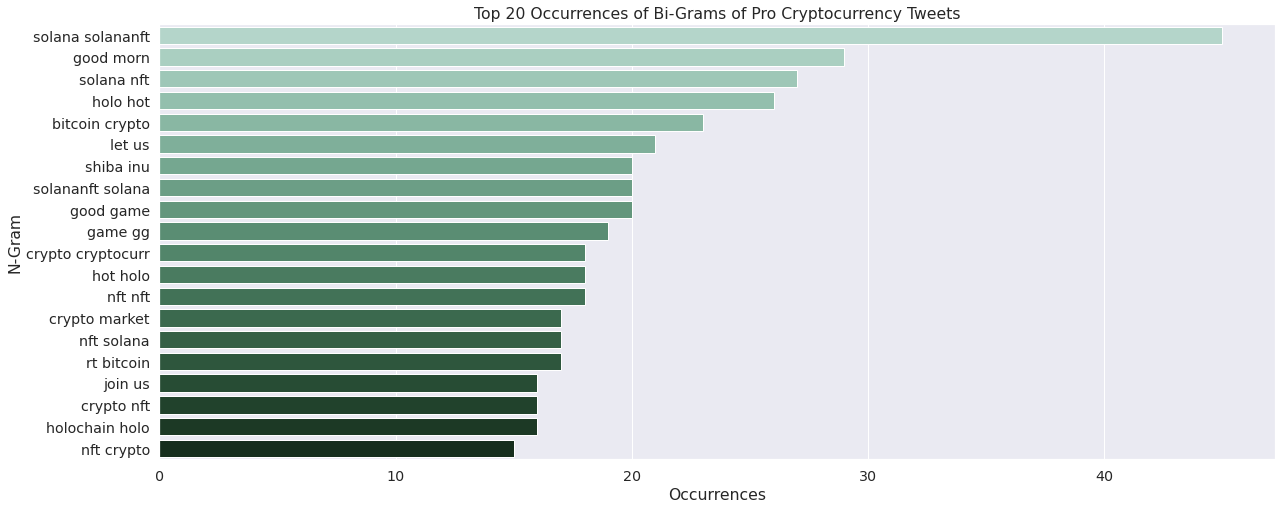

In [ ]:
counterDfPro = generateWordList(dfSub,'POSITIVE', SIZE)
counterDfProTop = counterDfPro.head(20)
print(counterDfProTop)

sns.set(font_scale = 1.3)
plt.figure(figsize=(20,8))
plt.title("Top 20 Occurrences of Bi-Grams of Pro Cryptocurrency Tweets")
sns.set_style('darkgrid')
sns.barplot(x="Occurrences", y="N-Gram", data=counterDfProTop, palette="ch:2,r=.1,l=0.8")

In [ ]:
#tri-grams
SIZE = 3


***N-Gram (Sentiment: NEUTRAL)
                          N-Gram  Occurrences
0                 bitcoin btc ln           25
1        btc ln lightningnetwork           25
2   ln lightningnetwork boltcoin           25
3              volum price volum           20
4      cryptocurr cardanoada btc           16
5             cardanoada btc ada           16
6               vault locat join           14
7                locat join play           14
8        join play coinhuntworld           14
9                  wl spot enter           12
10                alert 5x volum           12
11                5x volum price           12
12             eth trade altcoin           11
13          trade altcoin binanc           11
14      altcoin binanc cryptonew           11
15                 bear alert 5x           11
16           bitcoin reclaim 40k           10
17          reclaim 40k ethereum           10
18          40k ethereum altcoin           10
19       ethereum altcoin market           10


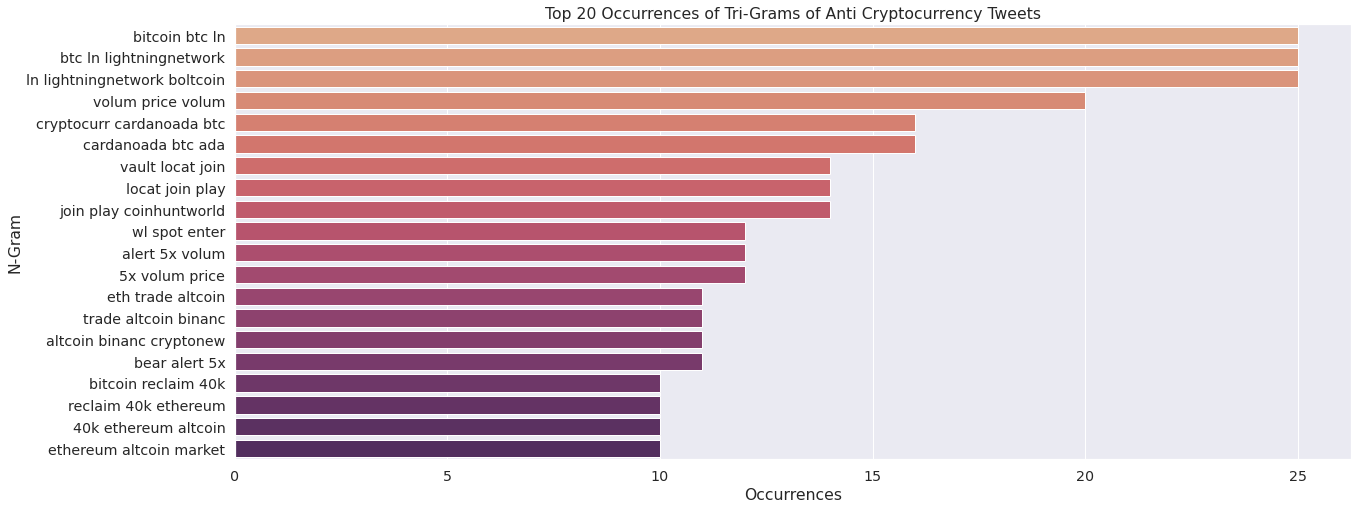

In [ ]:
counterDfAntiTop = generateWordList(dfSub, 'NEUTRAL', SIZE)
counterDfAntiTop = counterDfAntiTop.head(20)
print(counterDfAntiTop)

sns.set(font_scale = 1.3)
plt.figure(figsize=(20,8))
plt.title("Top 20 Occurrences of Tri-Grams of Anti Cryptocurrency Tweets")
sns.set_style('darkgrid')
sns.barplot(x="Occurrences", y="N-Gram", data=counterDfAntiTop, palette="flare")


***N-Gram (Sentiment: POSITIVE)
                          N-Gram  Occurrences
0                   good game gg           19
1             holochain holo hot           14
2                 laugh loud lol           12
3              free nft giveaway           10
4                   low avg high            9
5        whitelist alloc contest            8
6             alloc contest live            8
7              contest live idia            8
8            idia swap launchpad            8
9                  holo hot holo            8
10             nft giveaway past            8
11             giveaway past eth            8
12              past eth address            8
13              eth address like            8
14           address like follow            8
15              like follow join            8
16            follow join nftart            8
17         join nftart nftcommun            8
18  nftart nftcommun nftgiveaway            8
19     nftcommun nftgiveaway nft            8


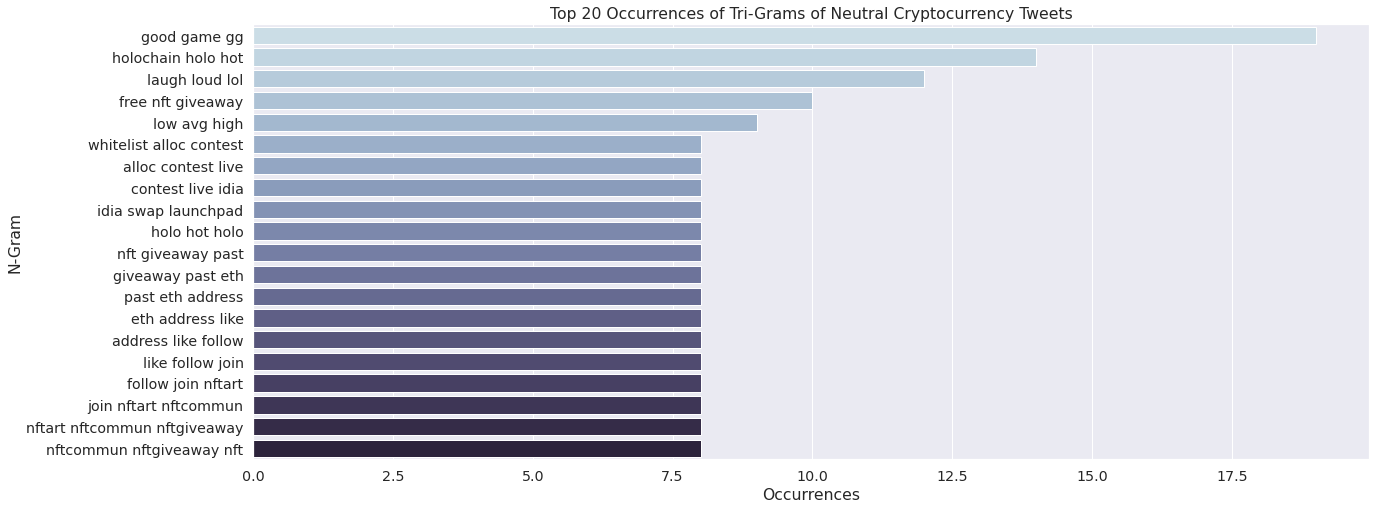

In [ ]:
counterDfNeutral = generateWordList(dfSub, 'POSITIVE', SIZE)
counterDfNeutralTop = counterDfNeutral.head(20)
print(counterDfNeutralTop)

sns.set(font_scale = 1.3)
plt.figure(figsize=(20,8))
plt.title("Top 20 Occurrences of Tri-Grams of Neutral Cryptocurrency Tweets")
sns.set_style('darkgrid')
sns.barplot(x="Occurrences", y="N-Gram", data=counterDfNeutralTop, palette="ch:s=.25,rot=-.25")


***N-Gram (Sentiment: NEGATIVE)
                         N-Gram  Occurrences
0                 sold gt price           23
1                   gt price sl           23
2                 price sl rank           23
3                   fp sl owner           23
4                link gt solana           23
5           gt solana solananft           23
6    solana solananft nftcommun           23
7       solananft nftcommun nft           23
8                  sl rank rank           21
9                  rank rank hr           21
10                   rank hr nr           18
11                     hr nr fp           18
12                     nr fp sl           18
13       cardboard citizen sold            9
14              citizen sold gt            9
15             make mistak miss            8
16             mistak miss shib            8
17           miss shib dogecoin            8
18          shib dogecoin floki            8
19  dogecoin floki babydogecoin            8


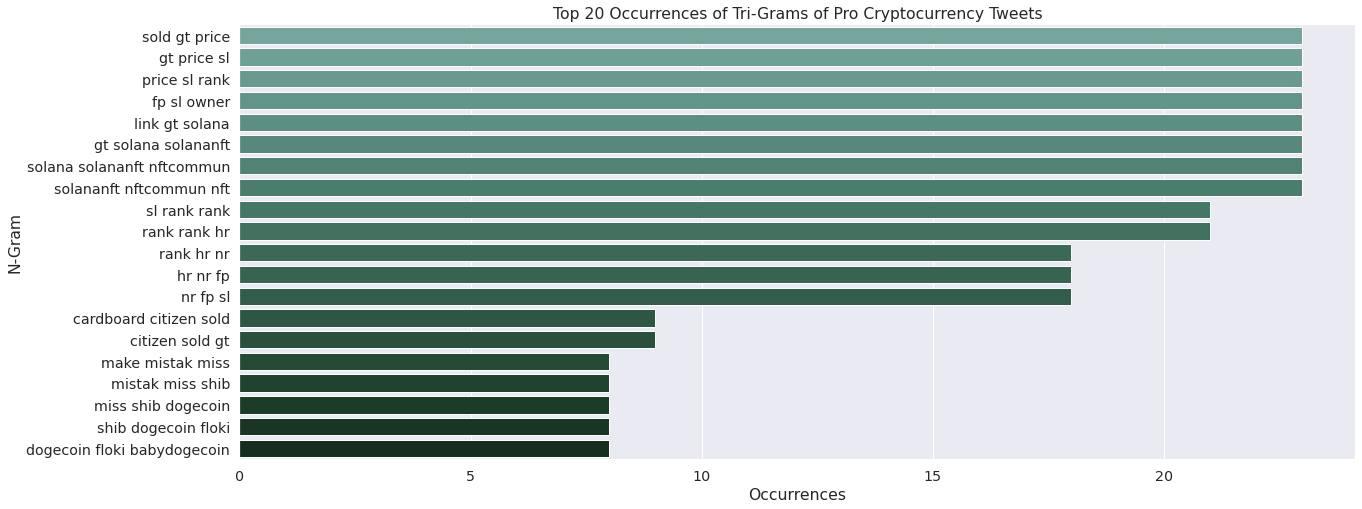

In [ ]:
counterDfPro = generateWordList(dfSub, 'NEGATIVE', SIZE)
counterDfProTop = counterDfPro.head(20)
print(counterDfProTop)

sns.set(font_scale = 1.3)
plt.figure(figsize=(20,8))
plt.title("Top 20 Occurrences of Tri-Grams of Pro Cryptocurrency Tweets")
sns.set_style('darkgrid')
sns.barplot(x="Occurrences", y="N-Gram", data=counterDfProTop, palette="ch:2,r=.2,l=.6")

# MODEL DEVELOPMENT

In [ ]:
#Model Development
def evaluateModel(model, X_test, y_test, title):
    '''
    print out classification scores
    :param model: used model
    :param X_test:
    :param y_test:
    :param title: title of the model
    '''
    print("\n*** " + title + " ***")
    predictions = model.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, predictions)
    recall = metrics.recall_score(y_test, predictions, average='weighted')
    precision = metrics.precision_score(y_test, predictions, average='weighted')
    f1 = metrics.f1_score(y_test, predictions, average='weighted')


    clsScoreDict = {
        "accuracy": accuracy
        , "recall": recall
        , "precision": precision
        , "f1": f1
    }

    print("Accuracy:  " + str(accuracy))
    print("Precision: " + str(precision))
    print("Recall:    " + str(recall))
    print("F1:        " + str(f1))
    print("\n\n")

    return clsScoreDict

# MODEL AND PREDICT


In [ ]:
def modelAndPredict(X, target, model):
    '''
    Build model and predict scores.

    :param X: X contains the stemmed and vectorized sentences.
    :param target: the sentiment rating
    :param model: selected model
    :return: X_test, y_test, and y_predicted values.
    '''

    modelType = model.__class__.__name__

    # Create training set with 80% of data and test set with 20% of data.
    X_train, X_test, y_train, y_test = train_test_split(
        X, target, train_size=0.80
    )

    # Build the model with the training data.
    clfModel = model.fit(X_train, y_train)
    clsScoreDict = evaluateModel(clfModel, X_test, y_test, modelType)

    # Predict target values.
    y_prediction = model.predict(X_test)
    
    print(classification_report(y_test,y_prediction))
    
    return X_test, y_test, y_prediction, clsScoreDict


# CONFUSION MATRIX

In [ ]:
def showFormattedConfusionMatrix(y_test, y_predicted):
    '''
    Draw the confusion matrix.
    :param y_test
    :param y_predicted
    :return:
    '''
    # print a simple confusion matrix
    cm = metrics.confusion_matrix(y_test.values, y_predicted)
    print(cm)

    # Show confusion matrix with colored background.
    Index = ['Actual -1', 'Actual 0', 'Actual 1' ]
    Cols = ['Pred -1', 'Pred 0', 'Pred 1']
    df = pd.DataFrame(cm, index=Index, columns=Cols)
    plt.figure(figsize=(3, 3))

    ax = sns.heatmap(df, cmap='Reds', annot=True, fmt='g')
    bottom, top = ax.get_ylim()
    ax.set(title="Cryptocurrency Data Sentiment")
    ax.set_ylim(bottom + 0.5, top - 0.5)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=30,
                       horizontalalignment='right')
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0,
                       horizontalalignment='right')

In [ ]:
# bi-gram vectorization
NGRAM_RANGE_START = 2
NGRAM_RANGE_END = 2

vectorizedTweets2, vectorDictionary2 = vectorizeList(stemmedLi, NGRAM_RANGE_START, NGRAM_RANGE_END)

In [ ]:
NGRAM_RANGE_START = 3
NGRAM_RANGE_END = 3

vectorizedTweets3, vectorDictionary3 = vectorizeList(stemmedLi, NGRAM_RANGE_START, NGRAM_RANGE_END)

In [ ]:
# bi-gram & tri-gram vectorization
NGRAM_RANGE_START = 2
NGRAM_RANGE_END = 3

vectorizedTweets23, vectorDictionary23 = vectorizeList(stemmedLi, NGRAM_RANGE_START, NGRAM_RANGE_END)

In [ ]:
#Logistic Regression
model = LogisticRegression(solver='liblinear',multi_class='ovr')


*** LogisticRegression ***
Accuracy:  0.8199827734711456
Precision: 0.8234867356923814
Recall:    0.8199827734711456
F1:        0.8058038633483235



              precision    recall  f1-score   support

    NEGATIVE       0.77      0.29      0.42       116
     NEUTRAL       0.78      0.95      0.86       570
    POSITIVE       0.88      0.79      0.83       475

    accuracy                           0.82      1161
   macro avg       0.81      0.68      0.71      1161
weighted avg       0.82      0.82      0.81      1161

[[ 34  54  28]
 [  4 544  22]
 [  6  95 374]]


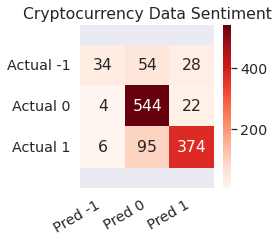

In [ ]:
X_test, y_test, y_predicted, lrScoreDict = modelAndPredict(vectorizedTweets, df['sentiment'], model)
showFormattedConfusionMatrix(y_test, y_predicted)


*** LogisticRegression ***
Accuracy:  0.6080964685615848
Precision: 0.692426230170396
Recall:    0.6080964685615848
F1:        0.5553353898578288



              precision    recall  f1-score   support

    NEGATIVE       0.84      0.18      0.30       116
     NEUTRAL       0.57      0.96      0.71       571
    POSITIVE       0.81      0.29      0.43       474

    accuracy                           0.61      1161
   macro avg       0.74      0.48      0.48      1161
weighted avg       0.69      0.61      0.56      1161

[[ 21  87   8]
 [  0 546  25]
 [  4 331 139]]


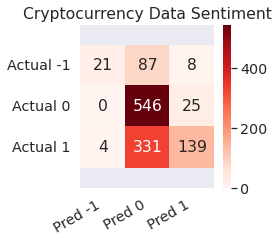

In [ ]:
#Bi-Gram Logistic Regression
X_test, y_test, y_predicted, lrScoreDict2 = modelAndPredict(vectorizedTweets2, df['sentiment'], model)
showFormattedConfusionMatrix(y_test, y_predicted)


*** LogisticRegression ***
Accuracy:  0.5521102497846684
Precision: 0.7249745577655448
Recall:    0.5521102497846684
F1:        0.4549169997833723



              precision    recall  f1-score   support

    NEGATIVE       0.96      0.18      0.30       138
     NEUTRAL       0.52      0.99      0.68       565
    POSITIVE       0.90      0.12      0.22       458

    accuracy                           0.55      1161
   macro avg       0.80      0.43      0.40      1161
weighted avg       0.72      0.55      0.45      1161

[[ 25 112   1]
 [  1 559   5]
 [  0 401  57]]


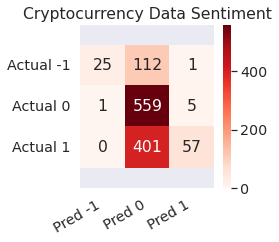

In [ ]:
#Tri-gram Logistic Regression
X_test, y_test, y_predicted, lrScoreDict3 = modelAndPredict(vectorizedTweets3, df['sentiment'], model)
showFormattedConfusionMatrix(y_test, y_predicted)


*** LogisticRegression ***
Accuracy:  0.5839793281653747
Precision: 0.7059337265680218
Recall:    0.5839793281653747
F1:        0.5101122903464403



              precision    recall  f1-score   support

    NEGATIVE       0.89      0.13      0.23       129
     NEUTRAL       0.55      0.98      0.70       571
    POSITIVE       0.85      0.22      0.35       461

    accuracy                           0.58      1161
   macro avg       0.76      0.44      0.43      1161
weighted avg       0.71      0.58      0.51      1161

[[ 17 105   7]
 [  1 559  11]
 [  1 358 102]]


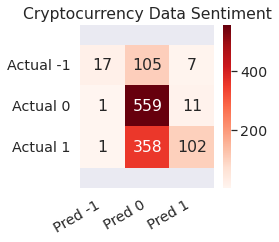

In [ ]:
#Bi-Gram & Tri-Gram Logistic Regression
X_test, y_test, y_predicted, lrScoreDict23 = modelAndPredict(vectorizedTweets23, df['sentiment'], model)
showFormattedConfusionMatrix(y_test, y_predicted)

In [ ]:
#Decision Tree
model = DecisionTreeClassifier(max_depth=40)


*** DecisionTreeClassifier ***
Accuracy:  0.7743324720068906
Precision: 0.7833356997067651
Recall:    0.7743324720068906
F1:        0.7507640660003626



              precision    recall  f1-score   support

    NEGATIVE       0.10      0.06      0.07       125
     NEUTRAL       0.47      0.53      0.50       556
    POSITIVE       0.41      0.40      0.41       480

    accuracy                           0.42      1161
   macro avg       0.33      0.33      0.33      1161
weighted avg       0.41      0.42      0.41      1161

[[ 21  83  21]
 [  1 544  11]
 [ 14 132 334]]


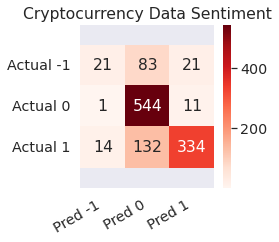

In [ ]:
X_test, y_test, y_predicted, treeScoreDict = modelAndPredict(vectorizedTweets, df['sentiment'], model)
showFormattedConfusionMatrix(y_test, y_predicted)

In [ ]:
model = RandomForestClassifier(random_state=10)


*** RandomForestClassifier ***
Accuracy:  0.8380706287683032
Precision: 0.8426095943277121
Recall:    0.8380706287683032
F1:        0.8264992976565237



              precision    recall  f1-score   support

    NEGATIVE       0.79      0.39      0.52       148
     NEUTRAL       0.80      0.97      0.88       559
    POSITIVE       0.91      0.82      0.86       454

    accuracy                           0.84      1161
   macro avg       0.84      0.73      0.75      1161
weighted avg       0.84      0.84      0.83      1161

[[ 58  66  24]
 [  5 543  11]
 [ 10  72 372]]


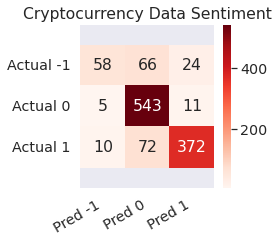

In [ ]:
#Random Forest Classifier
X_test, y_test, y_predicted, rfScoreDict = modelAndPredict(vectorizedTweets, df['sentiment'], model)
showFormattedConfusionMatrix(y_test, y_predicted)

In [ ]:
#Extra Trees Classifier
model = ExtraTreesClassifier()


*** ExtraTreesClassifier ***
Accuracy:  0.8630490956072352
Precision: 0.8660679934235617
Recall:    0.8630490956072352
F1:        0.8565582238922691



              precision    recall  f1-score   support

    NEGATIVE       0.13      0.07      0.10       121
     NEUTRAL       0.47      0.65      0.54       552
    POSITIVE       0.44      0.30      0.35       488

    accuracy                           0.44      1161
   macro avg       0.35      0.34      0.33      1161
weighted avg       0.42      0.44      0.42      1161

[[ 58  38  25]
 [  5 527  20]
 [  4  67 417]]


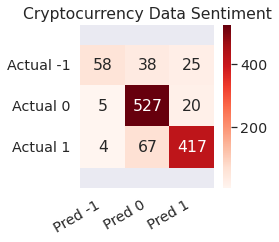

In [ ]:
X_test, y_test, y_predicted, xtreeScoreDict = modelAndPredict(vectorizedTweets, df['sentiment'], model)
showFormattedConfusionMatrix(y_test, y_predicted)

In [ ]:
#Bagging
model = BaggingClassifier(RandomForestClassifier())


*** BaggingClassifier ***
Accuracy:  0.834625322997416
Precision: 0.8466196673429
Recall:    0.834625322997416
F1:        0.8194335816780861



              precision    recall  f1-score   support

    NEGATIVE       0.88      0.31      0.45       121
     NEUTRAL       0.79      0.98      0.88       595
    POSITIVE       0.91      0.79      0.84       445

    accuracy                           0.83      1161
   macro avg       0.86      0.69      0.72      1161
weighted avg       0.85      0.83      0.82      1161

[[ 37  61  23]
 [  1 582  12]
 [  4  91 350]]


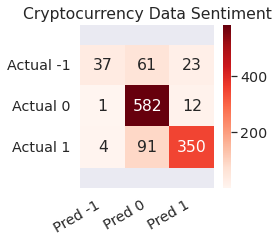

In [ ]:
X_test, y_test, y_predicted, baggingScoreDict = modelAndPredict(vectorizedTweets, df['sentiment'], model)
showFormattedConfusionMatrix(y_test, y_predicted)

In [ ]:
#AdaBoosing
model = AdaBoostClassifier(n_estimators=60)


*** AdaBoostClassifier ***
Accuracy:  0.7906976744186046
Precision: 0.8120829560940562
Recall:    0.7906976744186046
F1:        0.7787896515320204



              precision    recall  f1-score   support

    NEGATIVE       0.12      0.07      0.09       130
     NEUTRAL       0.50      0.66      0.57       581
    POSITIVE       0.39      0.27      0.32       450

    accuracy                           0.45      1161
   macro avg       0.34      0.34      0.33      1161
weighted avg       0.42      0.45      0.42      1161

[[ 53  61  16]
 [  7 570   4]
 [ 15 140 295]]


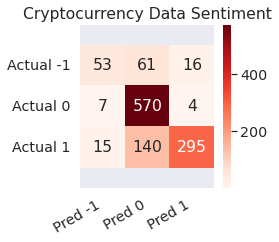

In [ ]:
X_test, y_test, y_predicted, adaBoostingScoreDict = modelAndPredict(vectorizedTweets, df['sentiment'], model)
showFormattedConfusionMatrix(y_test, y_predicted)

In [ ]:
#GradientBoosting 
model = GradientBoostingClassifier(learning_rate=0.3, n_estimators=150,max_leaf_nodes=5)


*** GradientBoostingClassifier ***
Accuracy:  0.8621877691645133
Precision: 0.8709006140498117
Recall:    0.8621877691645133
F1:        0.8550754773734077



              precision    recall  f1-score   support

    NEGATIVE       0.14      0.07      0.10       124
     NEUTRAL       0.51      0.63      0.57       574
    POSITIVE       0.41      0.35      0.38       463

    accuracy                           0.46      1161
   macro avg       0.36      0.35      0.35      1161
weighted avg       0.43      0.46      0.44      1161

[[ 59  52  13]
 [  1 568   5]
 [ 12  77 374]]


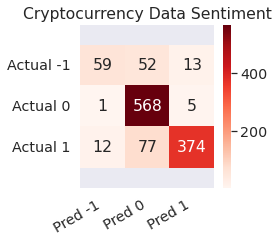

In [ ]:
X_test, y_test, y_predicted, gradientBoostingScoreDict = modelAndPredict(vectorizedTweets, df['sentiment'], model)
showFormattedConfusionMatrix(y_test, y_predicted)

In [ ]:
#K Neighbors Classifier
model = KNeighborsClassifier(n_neighbors=3, metric='minkowski', p = 2)


*** KNeighborsClassifier ***
Accuracy:  0.5779500430663221
Precision: 0.6987755293941152
Recall:    0.5779500430663221
F1:        0.5044553849938628



              precision    recall  f1-score   support

    NEGATIVE       0.45      0.13      0.20       119
     NEUTRAL       0.54      0.99      0.70       556
    POSITIVE       0.94      0.22      0.36       486

    accuracy                           0.58      1161
   macro avg       0.64      0.44      0.42      1161
weighted avg       0.70      0.58      0.50      1161

[[ 15 101   3]
 [  3 549   4]
 [ 15 364 107]]


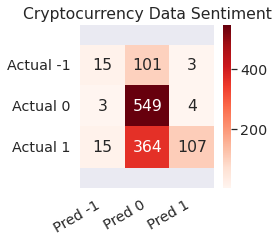

In [ ]:
X_test, y_test, y_predicted, knnScoreDict = modelAndPredict(vectorizedTweets, df['sentiment'], model)
showFormattedConfusionMatrix(y_test, y_predicted)

In [ ]:
#Linear Support Vector Classifier (SVC)
model = SVC( C=50,degree=50, probability=True)


*** SVC ***
Accuracy:  0.7932816537467701
Precision: 0.7892926572858407
Recall:    0.7932816537467701
F1:        0.7774728408591718



              precision    recall  f1-score   support

    NEGATIVE       0.70      0.25      0.37       122
     NEUTRAL       0.78      0.91      0.84       550
    POSITIVE       0.83      0.80      0.81       489

    accuracy                           0.79      1161
   macro avg       0.77      0.65      0.67      1161
weighted avg       0.79      0.79      0.78      1161

[[ 31  57  34]
 [  1 501  48]
 [ 12  88 389]]


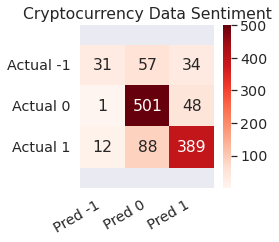

In [ ]:
X_test, y_test, y_predicted, svcScoreDict = modelAndPredict(vectorizedTweets, df['sentiment'], model)
showFormattedConfusionMatrix(y_test, y_predicted)

In [ ]:
#NaiveBayes Classifier
model = MultinomialNB(alpha=1.9)


*** MultinomialNB ***
Accuracy:  0.7579672695951766
Precision: 0.7529277674273757
Recall:    0.7579672695951766
F1:        0.7254075140284371



              precision    recall  f1-score   support

    NEGATIVE       0.00      0.00      0.00       117
     NEUTRAL       0.46      0.48      0.47       545
    POSITIVE       0.42      0.49      0.45       499

    accuracy                           0.43      1161
   macro avg       0.29      0.32      0.31      1161
weighted avg       0.40      0.43      0.41      1161

[[  6  53  58]
 [  1 433 111]
 [  2  56 441]]


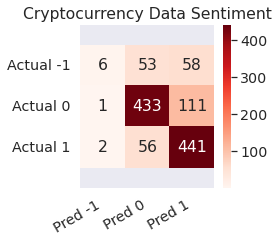

In [ ]:
X_test, y_test, y_predicted, naivebayesScoreDict = modelAndPredict(vectorizedTweets, df['sentiment'], model)
showFormattedConfusionMatrix(y_test, y_predicted)

In [ ]:
#Ridge Classifier
model = RidgeClassifier()



*** RidgeClassifier ***
Accuracy:  0.8199827734711456
Precision: 0.8269038134715395
Recall:    0.8199827734711456
F1:        0.8118351014653381



              precision    recall  f1-score   support

    NEGATIVE       0.78      0.43      0.55       119
     NEUTRAL       0.78      0.95      0.86       564
    POSITIVE       0.89      0.76      0.82       478

    accuracy                           0.82      1161
   macro avg       0.82      0.71      0.74      1161
weighted avg       0.83      0.82      0.81      1161

[[ 51  46  22]
 [  5 537  22]
 [  9 105 364]]


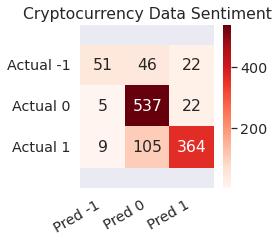

In [ ]:
X_test, y_test, y_predicted, ridgeScoreDict = modelAndPredict(vectorizedTweets, df['sentiment'], model)
showFormattedConfusionMatrix(y_test, y_predicted)

In [ ]:
#Model Comparisons
lrScoreDf = pd.DataFrame(lrScoreDict, index=["Logistic Regression"])
treeScoreDf = pd.DataFrame(treeScoreDict, index=["Decision Tree Classification"])
rfScoreDf = pd.DataFrame(rfScoreDict, index=["Random Forest Classification"])
xtreeScoreDf = pd.DataFrame(xtreeScoreDict, index=["Extra Trees Classification"])
knnScoreDf = pd.DataFrame(knnScoreDict, index=["K Neighbors Classification"])
svcScoreDf = pd.DataFrame(svcScoreDict, index=["Linear Support Vector Classifier"])
ridgeScoreDf = pd.DataFrame(ridgeScoreDict, index=["Ridge Classification"])
naivebayesScoreDf = pd.DataFrame(naivebayesScoreDict, index=["Naive Bayes Classification"])
gradientBoostingScoreDf = pd.DataFrame(gradientBoostingScoreDict, index=["Gradient Boosting"])
adaBoostingScoreDf = pd.DataFrame(adaBoostingScoreDict, index=[ "Ada Boosting"])
baggingScoreDf= pd.DataFrame(baggingScoreDict, index=["Bagging"])
lsScoreDf2 = pd.DataFrame(lrScoreDict2, index=["Bi-gram"])
lsScoreDf3 = pd.DataFrame(lrScoreDict3, index=["Tri-gram"])
lsScoreDf23 = pd.DataFrame(lrScoreDict23, index=["Bi-gram and Tri-gram"])

clsCompDf = pd.concat([lrScoreDf, lsScoreDf2, lsScoreDf3, lsScoreDf23, treeScoreDf, rfScoreDf, xtreeScoreDf, knnScoreDf, svcScoreDf, ridgeScoreDf,naivebayesScoreDf,gradientBoostingScoreDf,adaBoostingScoreDf,baggingScoreDf])

clsCompDf.sort_values(by=["accuracy", "f1"], ascending = False)


,accuracy,recall,precision,f1
Extra Trees Classification,0.863049,0.863049,0.866068,0.856558
Gradient Boosting,0.862188,0.862188,0.870901,0.855075
Random Forest Classification,0.838071,0.838071,0.842610,0.826499
Bagging,0.834625,0.834625,0.846620,0.819434
Logistic Regression,0.822567,0.822567,0.830543,0.809452
Ridge Classification,0.819983,0.819983,0.826904,0.811835
Linear Support Vector Classifier,0.793282,0.793282,0.789293,0.777473
Ada Boosting,0.790698,0.790698,0.812083,0.778790
Decision Tree Classification,0.774332,0.774332,0.783336,0.750764
Naive Bayes Classification,0.757967,0.757967,0.752928,0.725408


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
#Binary File Export
#To reuse the built model to predict other tweets, we will be saving the model as a binary file.
def modelAndPredict(X, target, model):
    '''
    Build model and predict scores.

    :param X: X contains the stemmed and vectorized sentences.
    :param target: the sentiment rating
    :param model: selected model
    :return: X_test, y_test, and y_predicted values.
    '''

    modelType = model.__class__.__name__

    # Create training set with 80% of data and test set with 20% of data.
    X_train, X_test, y_train, y_test = train_test_split(
        X, target, train_size=0.80
            )

    # Build the model with the training data.
    clfModel = model.fit(X_train, y_train)


    # save model to a pickle file
    # create directory for models
    if (not path.exists("./model")):
        makedirs('./model')
    pickle.dump(clfModel, open(f"./model/cryptocurrency_tweet_sentiment_{modelType}.pkl", "wb"))

    # load model
    loadedModel = pickle.load(open(f"./model/cryptocurrency_tweet_sentiment_{modelType}.pkl", "rb"))

    clsScoreDict = evaluateModel(loadedModel, X_test, y_test, modelType)

    # Predict target values.
    y_prediction = model.predict(X_test)

    print(classification_report(y_test,y_predicted))

    return X_test, y_test, y_prediction, clsScoreDict



*** VotingClassifier ***
Accuracy:  0.8630490956072352
Precision: 0.8704481121375436
Recall:    0.8630490956072352
F1:        0.855641616281727



              precision    recall  f1-score   support

    NEGATIVE       0.07      0.03      0.05       117
     NEUTRAL       0.50      0.60      0.54       568
    POSITIVE       0.42      0.38      0.40       476

    accuracy                           0.45      1161
   macro avg       0.33      0.34      0.33      1161
weighted avg       0.43      0.45      0.44      1161

[[ 53  46  18]
 [  3 554  11]
 [  5  76 395]]


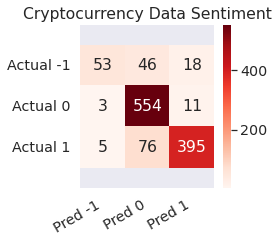

In [ ]:
clf1 = ExtraTreesClassifier()
clf2 =GradientBoostingClassifier()
clf3 = RandomForestClassifier()

model = VotingClassifier(estimators=[('ExtraTree', clf1), ('Gradient', clf2), ('Random', clf3)], voting='soft')

X_test, y_test, y_predicted, lrScoreDict = modelAndPredict(vectorizedTweets, df['sentiment'], model)
showFormattedConfusionMatrix(y_test, y_predicted)

predictions = model.predict(X_test)

#print(predictions)


*** VotingClassifier ***
Accuracy:  0.8458225667527993
Precision: 0.8494777697757865
Recall:    0.8458225667527993
F1:        0.8341893572056106



              precision    recall  f1-score   support

    NEGATIVE       0.07      0.03      0.04       123
     NEUTRAL       0.50      0.59      0.54       579
    POSITIVE       0.42      0.39      0.40       459

    accuracy                           0.45      1161
   macro avg       0.33      0.34      0.33      1161
weighted avg       0.42      0.45      0.43      1161

[[ 44  53  26]
 [  8 555  16]
 [  1  75 383]]


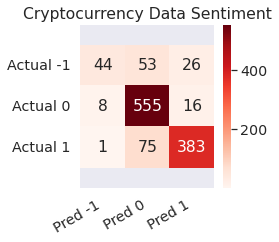

In [ ]:
clf1 = ExtraTreesClassifier()
clf2 =GradientBoostingClassifier()
clf3 = RandomForestClassifier()


model = VotingClassifier(estimators=[('ExtraTree', clf1), ('GradientBoosting', clf2), ('Random', clf3)], voting='hard')

X_test, y_test, y_predicted, lrScoreDict = modelAndPredict(vectorizedTweets, df['sentiment'], model)
showFormattedConfusionMatrix(y_test, y_predicted)


In [ ]:
print(model)

VotingClassifier(estimators=[('ExtraTree', ExtraTreesClassifier()),
                             ('GradientBoosting', GradientBoostingClassifier()),
                             ('Random', RandomForestClassifier())])


In [ ]:
with open("wordDictionary.json", "w") as fp:
    json.dump(vectorDictionary, fp)